<a href="https://colab.research.google.com/github/maenohiroki1123/DeepLearning2022Late/blob/main/DogVSCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras
画像を読み込む

### ライブラリの読み込み

In [ ]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

### 学習済みモデルの読み込み

In [ ]:
model=VGG16(weights='imagenet')

### 画像判定のための関数

In [ ]:
def predict(filename, featuresize):
  img=image.load_img(filename, target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  # 学習モデルで判定を実行
  preds=model.predict(preprocess_input(x))
  results=decode_predictions(preds,top=featuresize)[0]
  return results
# 関数終わり

### 画像表示のための関数

In [ ]:
def showimg(filename, title,i):
  im=Image.open(filename)#画像ファイルを開く
  im_list=np.array(im)#画像ビットデータをndarrayにする
  plt.subplot(2,5,i)
  plt.axis("off")
  plt.imshow(im_list)
#関数終わり


### kaggleにある画像データを利用する
https://www.kaggle.com/
<br>犬猫画像データ<br>
https://www.kaggle.com/犬猫判定用の画像データhttps://www.kaggle.com/c/dogs-vs-cats/data





## 指定されたURLからファイルをダウンロードする

In [ ]:
# wgwtでwebからファイルをダウンロードする
# GoogleColabでコマンドを実行するときは、先頭に!マークを必ずつけること
# 小さいファイルをGoogleドライブからDLするときは、以下のようにURLをつけるだけ
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt


--2022-10-04 00:47:38--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 142.250.103.138, 142.250.103.113, 142.250.103.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.103.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cc2q1rntvvqnddgkab6toff15ce2eps7/1664844450000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=a78f0e1e-7a08-4f07-97da-8540ded8973a [following]
--2022-10-04 00:47:38--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cc2q1rntvvqnddgkab6toff15ce2eps7/1664844450000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=a78f0e1e-7a08-4f07-97da-8540ded8973a
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 142.251

## Golbに自分のGoogleアカウントのドライブをマウントする

In [ ]:
# googlwドライブを操作するモジュールをimport
from google.colab import drive
# googleドライブをマウント
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DLしてきたファイルをマウントしたディレクトにコピーする

In [ ]:
# コピーファイルを置くディレクトリを作る
import os
dir_path="/content/drive/My Drive/2022LATE"
# すでにディレクトリがあってもエラーにしない
os.makedirs( dir_path, exist_ok=True)
!pwd # 今いるディレクトリを表示
# ファイルをコピー
!cp train.zip "/content/drive/My Drive/2022LATE"



/content


## GoogleドライブからColabへファイルコピー

In [ ]:
!cp "/content/drive/My Drive/2022LATE/ train.zip".

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/ train.zip.'
Try 'cp --help' for more information.


## zipファイルを解凍する

In [ ]:
# unzipコマンドで解凍

!unzip -o -q "train.zip"

print("zip解凍完了")

zip解凍完了


## 解凍した画像を使って画像判定させる

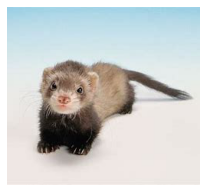

('n02443484', 'black-footed_ferret', 0.5775373)
('n02441942', 'weasel', 0.19618839)
('n02443114', 'polecat', 0.15776679)
('n02442845', 'mink', 0.058535773)
('n02490219', 'marmoset', 0.003596151)
('n02492035', 'capuchin', 0.0013826449)
('n02137549', 'mongoose', 0.0011052059)
('n02493509', 'titi', 0.0008583515)
('n02445715', 'skunk', 0.00069723144)
('n02444819', 'otter', 0.0005843955)


In [ ]:
# filename = "train/cat.101.jpg"
filename = "itati_otamesi.jpg"

plt.figure(figsize=(20, 10))

for i in range(1):

  showimg(filename, "What's this??", i+1)

# ループ終わり

plt.show()



# 表示した画像を判定

results = predict(filename, 10)

for result in results:

  print(result)